Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Dataset downloaded to: /kaggle/input/telco-customer-churn

Files in dataset directory:
  - WA_Fn-UseC_-Telco-Customer-Churn.csv

Loading main dataset file: WA_Fn-UseC_-Telco-Customer-Churn.csv
Dataset loaded successfully!

 DATASET BASIC INFORMATION
Dataset Shape: 7043 rows × 21 columns

Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 no

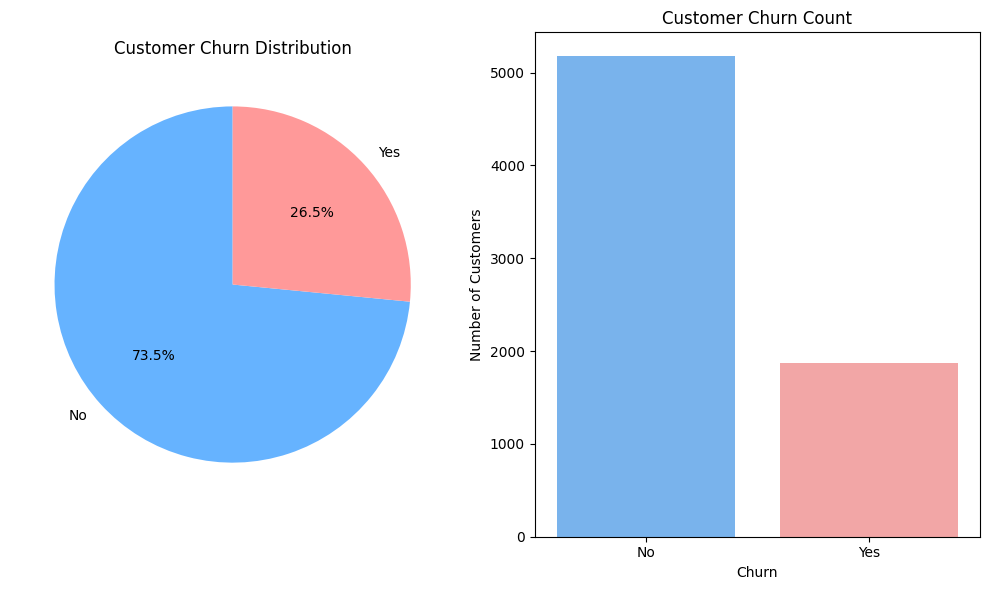


Unique Values per Column:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Categorical Columns (18):
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Numerical Columns (3):
['SeniorCitizen', 'tenure', 'MonthlyCharges']

Sample Values in Categorical Columns:

gender: ['Female' '

In [16]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("Downloading dataset from Kaggle...")
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
print(f"Dataset downloaded to: {path}")

print("\nFiles in dataset directory:")
for file in os.listdir(path):
    print(f"  - {file}")

csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if csv_files:
    main_file = csv_files[0]
    file_path = os.path.join(path, main_file)
    print(f"\nLoading main dataset file: {main_file}")


    df = pd.read_csv(file_path)

    print("Dataset loaded successfully!")

    # ===== BASIC DATASET ESSENCE =====
    print("\n" + "="*50)
    print(" DATASET BASIC INFORMATION")
    print("="*50)

    print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

    print("\nColumn Names and Data Types:")
    print(df.info())

    print("\nDescriptive Statistics (Numerical Columns):")
    print(df.describe())

    print("\nMissing Values Analysis:")
    missing_data = df.isnull().sum()
    missing_percent = (df.isnull().sum() / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Missing Percentage': missing_percent
    })
    print(missing_df[missing_df['Missing Count'] > 0])

    if missing_df[missing_df['Missing Count'] > 0].empty:
        print("No missing values found!")

    print("\nData Types Summary:")
    print(df.dtypes.value_counts())

    if 'Churn' in df.columns:
        print("\nTARGET VARIABLE (Churn) ANALYSIS:")
        churn_counts = df['Churn'].value_counts()
        churn_percent = df['Churn'].value_counts(normalize=True) * 100

        churn_summary = pd.DataFrame({
            'Count': churn_counts,
            'Percentage': churn_percent
        })
        print(churn_summary)

        plt.figure(figsize=(10, 6))

        plt.subplot(1, 2, 1)
        plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
        plt.title('Customer Churn Distribution')

        plt.subplot(1, 2, 2)
        sns.countplot(data=df, x='Churn', palette=['#66b3ff','#ff9999'])
        plt.title('Customer Churn Count')
        plt.ylabel('Number of Customers')

        plt.tight_layout()
        plt.show()

    print("\nUnique Values per Column:")
    unique_counts = df.nunique()
    print(unique_counts)

    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    print(f"\nCategorical Columns ({len(categorical_cols)}):")
    print(categorical_cols)

    numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print(f"\nNumerical Columns ({len(numerical_cols)}):")
    print(numerical_cols)

    print("\nSample Values in Categorical Columns:")
    for col in categorical_cols[:5]:
        if col != 'customerID':
            print(f"\n{col}: {df[col].unique()[:10]}")

    print("\n Data Quality Checks:")

    empty_strings = {}
    for col in df.columns:
        if df[col].dtype == 'object':
            empty_count = (df[col] == '').sum()
            if empty_count > 0:
                empty_strings[col] = empty_count

    if empty_strings:
        print("Empty strings found:")
        for col, count in empty_strings.items():
            print(f"  - {col}: {count} empty values")
    else:
        print("No empty strings found")

    duplicates = df.duplicated().sum()
    print(f"Duplicate rows: {duplicates}")


    if 'tenure' in df.columns:
        print(f"Customer Tenure Range: {df['tenure'].min()} to {df['tenure'].max()} months")
        print(f"Average Tenure: {df['tenure'].mean():.1f} months")

    if 'MonthlyCharges' in df.columns:
        print(f"Monthly Charges Range: ${df['MonthlyCharges'].min():.2f} to ${df['MonthlyCharges'].max():.2f}")
        print(f"Average Monthly Charge: ${df['MonthlyCharges'].mean():.2f}")

    if 'TotalCharges' in df.columns:
        if df['TotalCharges'].dtype == 'object':
            df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
        print(f" Total Charges Range: ${df['TotalCharges'].min():.2f} to ${df['TotalCharges'].max():.2f}")

else:
    print("No CSV files found in the dataset directory!")
    print("Files found:", os.listdir(path))

print("\n" + "="*60)

In [22]:
print(" KPI ANALYSIS")

print(" Data Preparation & Creating Calculated Fields...")

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df['TotalCharges'].fillna(0, inplace=True)

df['CLV_Total'] = df['TotalCharges']
df['Monthly_CLV'] = df['MonthlyCharges']

# Assume profit margin of 20% on services (business assumption)
PROFIT_MARGIN = 0.20
df['Monthly_Profit'] = df['MonthlyCharges'] * PROFIT_MARGIN
df['Total_Profit'] = df['TotalCharges'] * PROFIT_MARGIN

# Customer Value Tiers (based on monthly charges)
def categorize_customer_value(monthly_charge):
    if monthly_charge <= 50:
        return 'Low Value'
    elif monthly_charge <= 100:
        return 'Medium Value'
    else:
        return 'High Value'

df['Value_Tier'] = df['MonthlyCharges'].apply(categorize_customer_value)

# Tenure-based segments
def categorize_tenure(tenure):
    if tenure <= 12:
        return 'New (0-12m)'
    elif tenure <= 36:
        return 'Mid (13-36m)'
    else:
        return 'Loyal (37+m)'

df['Tenure_Segment'] = df['tenure'].apply(categorize_tenure)

# Service Bundle Value (count of premium services)
premium_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

df['Premium_Service_Count'] = df[premium_services].apply(
    lambda x: (x == 'Yes').sum(), axis=1
)

print("\n Step 2: Calculating Primary KPIs...")

# KPI 1: Monthly Recurring Revenue (MRR) Impact
total_mrr = df['MonthlyCharges'].sum()
churned_mrr = df[df['Churn'] == 'Yes']['MonthlyCharges'].sum()
retained_mrr = df[df['Churn'] == 'No']['MonthlyCharges'].sum()

mrr_loss_percentage = (churned_mrr / total_mrr) * 100

# KPI 2: Customer Lifetime Value at Risk
total_clv_at_risk = df[df['Churn'] == 'Yes']['CLV_Total'].sum()
average_clv_lost = df[df['Churn'] == 'Yes']['CLV_Total'].mean()

# KPI 3: Monthly Profit Impact
total_monthly_profit = df['Monthly_Profit'].sum()
monthly_profit_lost = df[df['Churn'] == 'Yes']['Monthly_Profit'].sum()
profit_loss_percentage = (monthly_profit_lost / total_monthly_profit) * 100


print("\n" + "="*60)
print("PRIMARY KPIs")
print("="*60)

print(f"\n KPI 1: REVENUE IMPACT")
print(f"   • Total Monthly Recurring Revenue (MRR): ${total_mrr:,.2f}")
print(f"   • MRR Lost to Churn: ${churned_mrr:,.2f}")
print(f"   • MRR Retention Rate: {100 - mrr_loss_percentage:.1f}%")
print(f"   • MRR Loss Percentage: {mrr_loss_percentage:.1f}%")

print(f"\n KPI 2: CUSTOMER LIFETIME VALUE AT RISK")
print(f"   • Total CLV at Risk: ${total_clv_at_risk:,.2f}")
print(f"   • Average CLV Lost per Churned Customer: ${average_clv_lost:,.2f}")
print(f"   • Churned Customers: {len(df[df['Churn'] == 'Yes'])}")

print(f"\n KPI 3: MONTHLY PROFIT IMPACT")
print(f"   • Total Monthly Profit: ${total_monthly_profit:,.2f}")
print(f"   • Monthly Profit Lost to Churn: ${monthly_profit_lost:,.2f}")
print(f"   • Profit Loss Percentage: {profit_loss_percentage:.1f}%")



 KPI ANALYSIS
 Data Preparation & Creating Calculated Fields...

 Step 2: Calculating Primary KPIs...

PRIMARY KPIs

 KPI 1: REVENUE IMPACT
   • Total Monthly Recurring Revenue (MRR): $456,116.60
   • MRR Lost to Churn: $139,130.85
   • MRR Retention Rate: 69.5%
   • MRR Loss Percentage: 30.5%

 KPI 2: CUSTOMER LIFETIME VALUE AT RISK
   • Total CLV at Risk: $2,862,926.90
   • Average CLV Lost per Churned Customer: $1,531.80
   • Churned Customers: 1869

 KPI 3: MONTHLY PROFIT IMPACT
   • Total Monthly Profit: $91,223.32
   • Monthly Profit Lost to Churn: $27,826.17
   • Profit Loss Percentage: 30.5%



 Step 3: Creating KPI Visualizations...


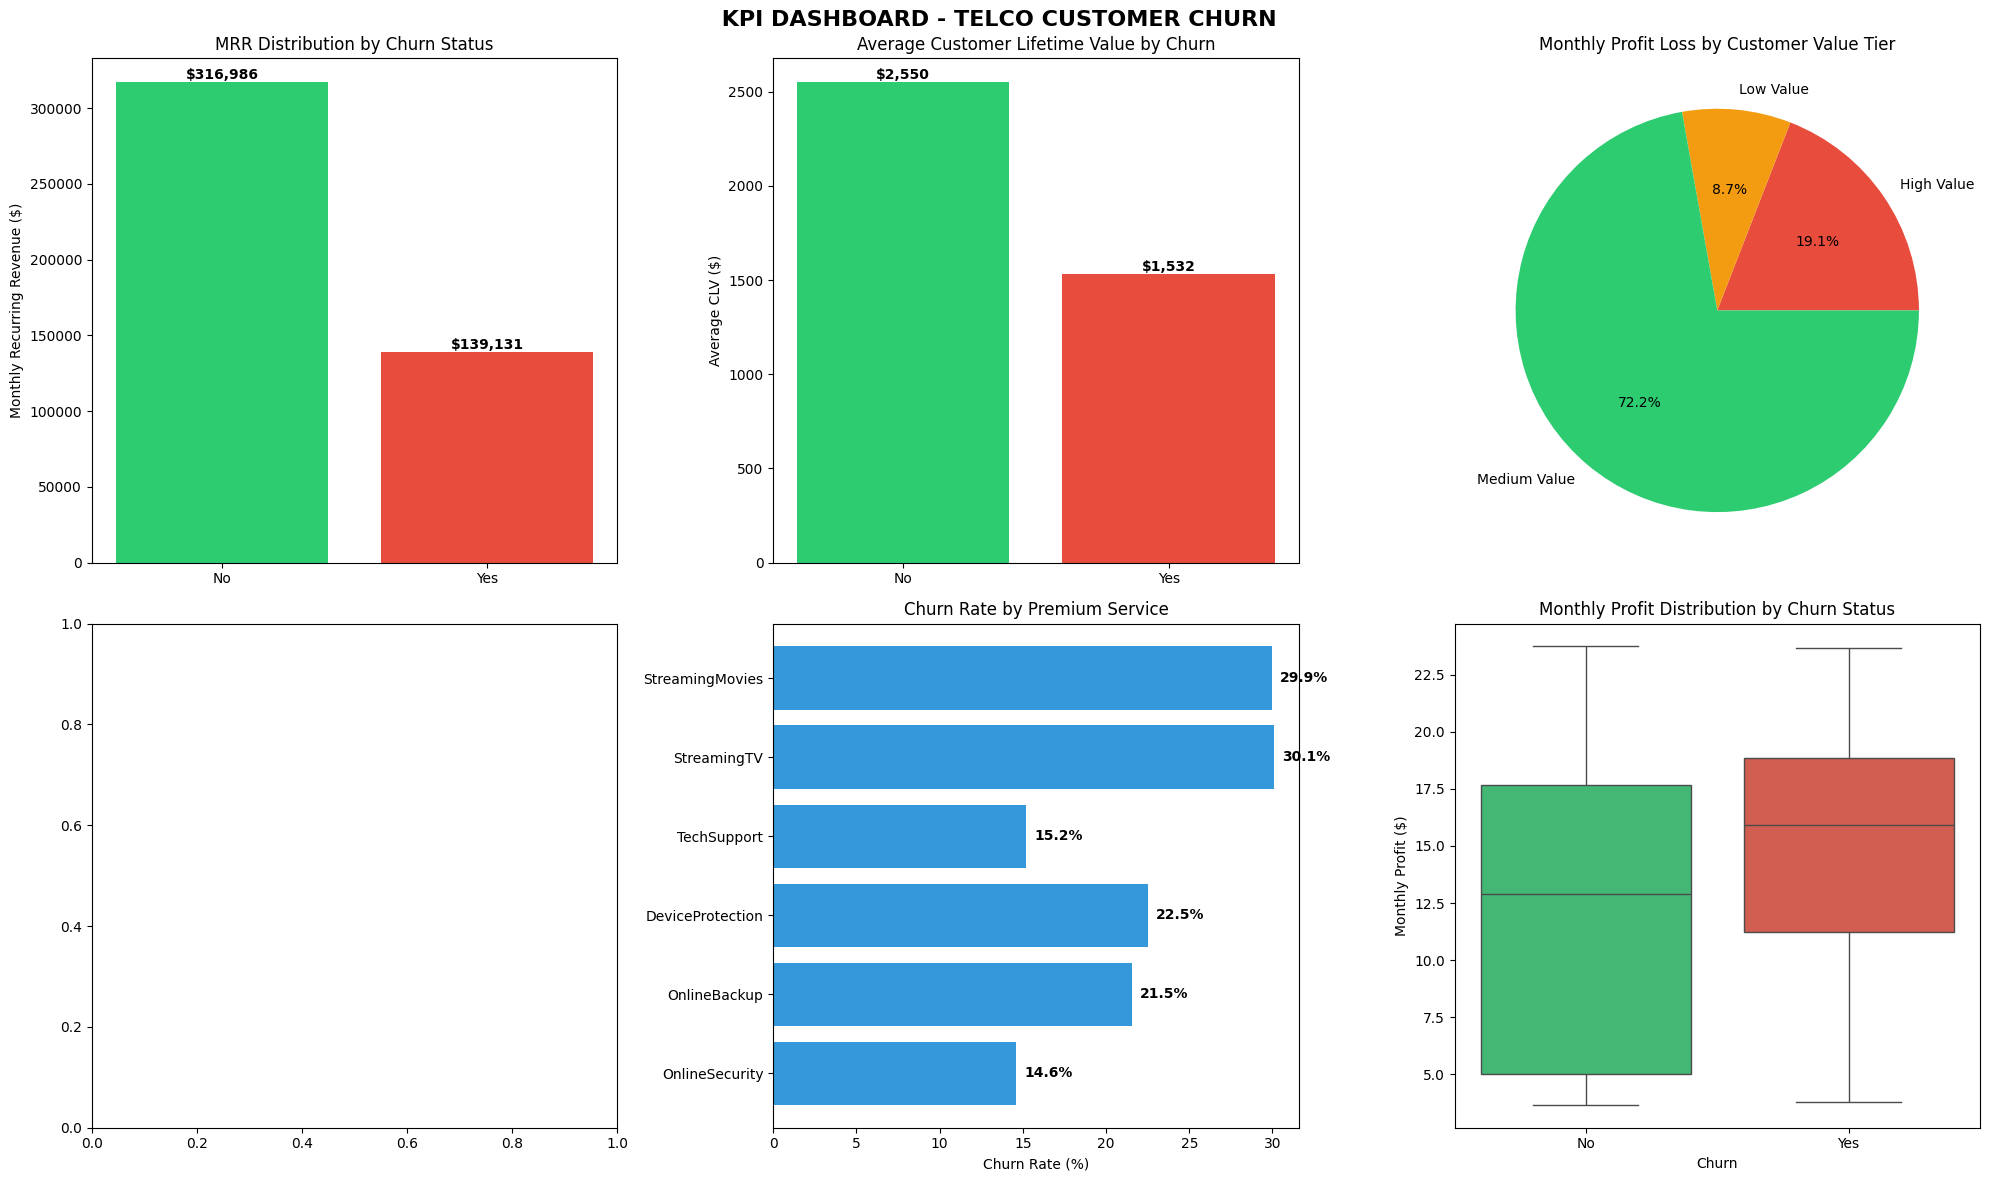


 KEY INSIGHTS

 High-Value Customer Analysis:
   • High-value customers churn rate: 28.0%
   • Number of high-value customers at risk: 253

 Service Profitability Analysis:
   • OnlineSecurity: $15.77 avg monthly profit
   • OnlineBackup: $16.62 avg monthly profit
   • DeviceProtection: $16.96 avg monthly profit

 Customer Retention Value:
   • Loyal customers (37+ months) contribute: $43,219.64 monthly profit
   • That's 47.4% of total monthly profit


In [23]:
print("\n Step 3: Creating KPI Visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle(' KPI DASHBOARD - TELCO CUSTOMER CHURN',
             fontsize=16, fontweight='bold', y=0.98)

# MRR Distribution by Churn Status
mrr_by_churn = df.groupby('Churn')['MonthlyCharges'].sum().reset_index()
axes[0,0].bar(mrr_by_churn['Churn'], mrr_by_churn['MonthlyCharges'],
              color=['#2ecc71', '#e74c3c'])
axes[0,0].set_title('MRR Distribution by Churn Status')
axes[0,0].set_ylabel('Monthly Recurring Revenue ($)')
for i, v in enumerate(mrr_by_churn['MonthlyCharges']):
    axes[0,0].text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# CLV Distribution by Churn Status
clv_by_churn = df.groupby('Churn')['CLV_Total'].mean().reset_index()
axes[0,1].bar(clv_by_churn['Churn'], clv_by_churn['CLV_Total'],
              color=['#2ecc71', '#e74c3c'])
axes[0,1].set_title('Average Customer Lifetime Value by Churn')
axes[0,1].set_ylabel('Average CLV ($)')
for i, v in enumerate(clv_by_churn['CLV_Total']):
    axes[0,1].text(i, v, f'${v:,.0f}', ha='center', va='bottom', fontweight='bold')

# Profit Loss by Value Tier
profit_loss_by_tier = df[df['Churn'] == 'Yes'].groupby('Value_Tier')['Monthly_Profit'].sum()
axes[0,2].pie(profit_loss_by_tier.values, labels=profit_loss_by_tier.index,
              autopct='%1.1f%%', colors=['#e74c3c', '#f39c12', '#2ecc71'])
axes[0,2].set_title('Monthly Profit Loss by Customer Value Tier')

# Premium Services vs Churn Rate
service_churn = []
for service in premium_services:
    churn_rate = df[df[service] == 'Yes']['Churn'].value_counts(normalize=True).get('Yes', 0) * 100
    service_churn.append(churn_rate)

axes[1,1].barh(premium_services, service_churn, color='#3498db')
axes[1,1].set_title('Churn Rate by Premium Service')
axes[1,1].set_xlabel('Churn Rate (%)')
for i, v in enumerate(service_churn):
    axes[1,1].text(v + 0.5, i, f'{v:.1f}%', va='center', fontweight='bold')

# Monthly Profit Distribution by Churn
sns.boxplot(data=df, x='Churn', y='Monthly_Profit', ax=axes[1,2],
            palette=['#2ecc71', '#e74c3c'])
axes[1,2].set_title('Monthly Profit Distribution by Churn Status')
axes[1,2].set_ylabel('Monthly Profit ($)')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print(" KEY INSIGHTS")
print("="*60)

# High-Value Customer Analysis
high_value_churn_rate = (df[(df['Value_Tier'] == 'High Value') & (df['Churn'] == 'Yes')].shape[0] /
                         df[df['Value_Tier'] == 'High Value'].shape[0]) * 100

print(f"\n High-Value Customer Analysis:")
print(f"   • High-value customers churn rate: {high_value_churn_rate:.1f}%")
print(f"   • Number of high-value customers at risk: {df[(df['Value_Tier'] == 'High Value') & (df['Churn'] == 'Yes')].shape[0]}")

# Most Profitable Services Analysis
print(f"\n Service Profitability Analysis:")
for service in premium_services[:3]:  # Show top 3
    service_profit = df[df[service] == 'Yes']['Monthly_Profit'].mean()
    print(f"   • {service}: ${service_profit:.2f} avg monthly profit")

# Customer Retention Value
loyal_customers_profit = df[df['Tenure_Segment'] == 'Loyal (37+m)']['Monthly_Profit'].sum()
print(f"\n Customer Retention Value:")
print(f"   • Loyal customers (37+ months) contribute: ${loyal_customers_profit:,.2f} monthly profit")
print(f"   • That's {(loyal_customers_profit/total_monthly_profit)*100:.1f}% of total monthly profit")

